In [1]:
import pandas as pd
from datetime import date
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

from DataSynthesizer.datatypes.utils.DataType import DataType
from DataSynthesizer.DataDescriber import DataDescriber
from DataSynthesizer.DataGenerator import DataGenerator
from DataSynthesizer.ModelInspector import ModelInspector
from DataSynthesizer.lib.utils import read_json_file, display_bayesian_network

In [2]:
mergedData = pd.read_excel('TabellaFinaleSenzaNaN.xlsx', sheet_name=None)

In [3]:
mergedData['Sheet1'].head()

Unnamed: 0  HDN_CODE  Sesso  ETA                DATA  ASCVD_Score  \
0           0      2236      0   64 2021-02-26 00:00:00        27.30   
1           1      6426      0   48 2021-04-02 00:00:00         2.56   
2           2      8377      0   56 2020-08-31 00:00:00         7.80   
3           3     11463      0   71 2020-08-31 00:00:00        24.74   
4           4     11463      0   71 2021-03-31 10:54:33        -1.00   

   DATA_INT  num_visita  Charlson_Totale  Charlson_Diabete  ...  Stress level  \
0       422           0               -1                -1  ...             0   
1       457           0                2                 0  ...             0   
2       243           0                1                 0  ...            -1   
3       243           0                3                 0  ...            -1   
4       456           1               -1                -1  ...             0   

   DASS21 anxiety  Anxiety level  DASS21 depression  Depression level  \
0               0              0                  0                 0   
1               4              1                  7                 2   
2              -1             -1                 -1                -1   
3              -1             -1                 -1                -1   
4               0              0                  0                 0   

   Insomnia severity index  ISI level  SF36 general health  Resilience  \
0                        8          1                   75          64   
1                        6          0                   10          54   
2                       -1         -1                   -1          -1   
3                       -1         -1                   -1          -1   
4                        0          0                   90          88   

   Outcome  
0        1  
1        0  
2       -1  
3       -1  
4        3  

[5 rows x 81 columns]

In [4]:
# tolgo la prima colonna e seleziono il primo foglio
df = mergedData['Sheet1'].iloc[:, 1:]

In [5]:
df.head()

HDN_CODE  Sesso  ETA                DATA  ASCVD_Score  DATA_INT  \
0      2236      0   64 2021-02-26 00:00:00        27.30       422   
1      6426      0   48 2021-04-02 00:00:00         2.56       457   
2      8377      0   56 2020-08-31 00:00:00         7.80       243   
3     11463      0   71 2020-08-31 00:00:00        24.74       243   
4     11463      0   71 2021-03-31 10:54:33        -1.00       456   

   num_visita  Charlson_Totale  Charlson_Diabete  Stifness  ...  Stress level  \
0           0               -1                -1       6.7  ...             0   
1           0                2                 0      -1.0  ...             0   
2           0                1                 0      -1.0  ...            -1   
3           0                3                 0      -1.0  ...            -1   
4           1               -1                -1      -1.0  ...             0   

   DASS21 anxiety  Anxiety level  DASS21 depression  Depression level  \
0               0              0                  0                 0   
1               4              1                  7                 2   
2              -1             -1                 -1                -1   
3              -1             -1                 -1                -1   
4               0              0                  0                 0   

   Insomnia severity index  ISI level  SF36 general health  Resilience  \
0                        8          1                   75          64   
1                        6          0                   10          54   
2                       -1         -1                   -1          -1   
3                       -1         -1                   -1          -1   
4                        0          0                   90          88   

   Outcome  
0        1  
1        0  
2       -1  
3       -1  
4        3  

[5 rows x 80 columns]

In [6]:
df.corr()
#df.insert(0, 'index', range(0, len(df)))

HDN_CODE     Sesso       ETA  ASCVD_Score  DATA_INT  \
HDN_CODE                 1.000000  0.121085 -0.182535    -0.066412 -0.019574   
Sesso                    0.121085  1.000000 -0.093710    -0.180332  0.048695   
ETA                     -0.182535 -0.093710  1.000000     0.289960 -0.022627   
ASCVD_Score             -0.066412 -0.180332  0.289960     1.000000  0.183939   
DATA_INT                -0.019574  0.048695 -0.022627     0.183939  1.000000   
...                           ...       ...       ...          ...       ...   
Insomnia severity index  0.026700  0.090021 -0.052276     0.035991  0.491820   
ISI level                0.028603  0.073929 -0.047747     0.052571  0.558207   
SF36 general health      0.002113  0.011086 -0.047178     0.085283  0.593869   
Resilience               0.039770  0.014972 -0.044581     0.064433  0.610140   
Outcome                  0.037087  0.026280 -0.057754     0.127224  0.499419   

                         num_visita  Charlson_Totale  Charlson_Diabete  \
HDN_CODE                  -0.093135         0.008784          0.061502   
Sesso                     -0.070632        -0.039961         -0.032406   
ETA                        0.028027         0.443641          0.100532   
ASCVD_Score                0.010743         0.212747          0.173310   
DATA_INT                   0.351684        -0.252463         -0.317607   
...                             ...              ...               ...   
Insomnia severity index    0.307831        -0.126749         -0.136305   
ISI level                  0.324752        -0.139361         -0.153496   
SF36 general health        0.286707        -0.190846         -0.194917   
Resilience                 0.332233        -0.175459         -0.187232   
Outcome                    0.379419        -0.085969         -0.080207   

                         Stifness       CAP  ...  Stress level  \
HDN_CODE                -0.026308 -0.032388  ...      0.015279   
Sesso                   -0.063218 -0.011620  ...      0.064809   
ETA                      0.062754  0.048790  ...     -0.082152   
ASCVD_Score              0.236614  0.238496  ...      0.045689   
DATA_INT                 0.009919  0.067973  ...      0.529293   
...                           ...       ...  ...           ...   
Insomnia severity index  0.128168  0.210827  ...      0.774640   
ISI level                0.133890  0.214424  ...      0.819068   
SF36 general health      0.073045  0.134960  ...      0.620662   
Resilience               0.077876  0.140281  ...      0.686619   
Outcome                  0.175038  0.262976  ...      0.602197   

                         DASS21 anxiety  Anxiety level  DASS21 depression  \
HDN_CODE                       0.005485      -0.001012          -0.008527   
Sesso                          0.134510       0.123965           0.060994   
ETA                           -0.041458      -0.046707          -0.011684   
ASCVD_Score                    0.046986       0.041020           0.045642   
DATA_INT                       0.486153       0.508481           0.476737   
...                                 ...            ...                ...   
Insomnia severity index        0.756124       0.748275           0.726044   
ISI level                      0.774705       0.777881           0.751267   
SF36 general health            0.532028       0.564299           0.521473   
Resilience                     0.602195       0.630486           0.566934   
Outcome                        0.521162       0.543962           0.520610   

                         Depression level  Insomnia severity index  ISI level  \
HDN_CODE                        -0.015340                 0.026700   0.028603   
Sesso                            0.052101                 0.090021   0.073929   
ETA                             -0.008560                -0.052276  -0.047747   
ASCVD_Score                      0.050538                 0.035991   0.052571   
DATA_INT                         0.528474           

In [7]:
df = df[[
        'HDN_CODE', 
        'ETA',
        'ASCVD_Score',
        'Charlson_Totale',
        'BMI',
        'BMI_Ricovero', 
        'BMIPostRicovero',
        'Fumatore',
        'GlobuliBianchi',
        'Linfociti_Assoluti',
        'GPT_ALT', 
        'D_dimero',
        'PCR',
        'DurataRicovero',
        'Stress level',
        'Depression level',
        'Anxiety level',
        'Outcome'
        ]]

In [8]:
df = df[df['Outcome'] != -1]
df.to_csv('TabellaFinaleInputProiezioni.csv', index=False)
df.to_excel('TabellaFinaleInputProiezioni.xlsx', index=False)

In [9]:
df['Charlson_Totale'].describe()

count    176.000000
mean       0.687500
std        1.994009
min       -1.000000
25%       -1.000000
50%        0.000000
75%        2.000000
max       10.000000
Name: Charlson_Totale, dtype: float64

## Parametri utente

In [10]:
input_data = 'TabellaFinaleInputProiezioni.csv' 
mode = 'correlated_attribute_mode'
description_file = 'description_500_completa_correlated_datatypes_0_degree_no_nan_proiezioni.json'
synthetic_data = 'synthetic_data_correlated_datatypes_0_degree_no_nan_proiezioni.csv'

In [11]:
for col in df.columns:
    print(f'\'{col}\': False,')

'HDN_CODE': False,
'ETA': False,
'ASCVD_Score': False,
'Charlson_Totale': False,
'BMI': False,
'BMI_Ricovero': False,
'BMIPostRicovero': False,
'Fumatore': False,
'GlobuliBianchi': False,
'Linfociti_Assoluti': False,
'GPT_ALT': False,
'D_dimero': False,
'PCR': False,
'DurataRicovero': False,
'Stress level': False,
'Depression level': False,
'Anxiety level': False,
'Outcome': False,


In [12]:
# An attribute is categorical if its domain size is less than this threshold.
threshold_value = 10
attr_to_datatype = {'HDN_CODE': DataType.INTEGER,
                    #'index': DataType.INTEGER,
                    'ETA': DataType.INTEGER,
                    'ASCVD_Score': DataType.FLOAT,
                    'Charlson_Totale': DataType.INTEGER,
                    'BMI': DataType.FLOAT ,
                    'BMI_Ricovero': DataType.FLOAT ,
                    'BMIPostRicovero': DataType.FLOAT ,
                    'Fumatore': DataType.INTEGER ,
                    'GlobuliBianchi': DataType.INTEGER ,
                    'Linfociti_Assoluti': DataType.INTEGER ,
                    'GPT_ALT': DataType.INTEGER ,
                    'D_dimero': DataType.INTEGER ,
                    'PCR': DataType.FLOAT ,
                    'DurataRicovero':DataType.INTEGER,
                    'Stress level': DataType.INTEGER ,
                    'Anxiety level': DataType.INTEGER ,
                    'Depression level': DataType.INTEGER ,
                    'Outcome':DataType.INTEGER}

# specify categorical attributes
categorical_attributes = {#'HDN_CODE': False,
                          #'ETA': False,
                          'ASCVD_Score': False,
                          'Charlson_Totale': True,
                          'Alcool': True,
                          #'BMI': False,
                          #'BMI_Ricovero': False,
                          #'BMIPostRicovero': False,
                          'Fumatore': True,
                          #'GlobuliBianchi': False,
                          #'Linfociti_Assoluti': False,
                          #'GPT_ALT': False,
                          #'D_dimero': False,
                          #'PCR': False,
                          #'DurataRicovero':False,
                          'Stress level': True,
                          'Anxiety level': True,
                          'Depression level': True,
                          'Outcome':True}

# specify which attributes are candidate keys of input dataset.
candidate_keys = {'HDN_CODE':True}

# A parameter in Differential Privacy. It roughly means that removing a row in the input dataset will not 
# change the probability of getting the same output more than a multiplicative difference of exp(epsilon).
# Increase epsilon value to reduce the injected noises. Set epsilon=0 to turn off differential privacy.
epsilon = 0

# The maximum number of parents in Bayesian network, i.e., the maximum number of incoming edges.
degree_of_bayesian_network = 2

# Number of tuples generated in synthetic dataset.
num_tuples_to_generate = 1000

In [13]:
# istanzio il data describer
describer = DataDescriber(category_threshold=threshold_value)
describer.describe_dataset_in_correlated_attribute_mode(dataset_file=input_data, 
                                                        epsilon=epsilon,
                                                        k=degree_of_bayesian_network,
                                                        attribute_to_datatype=attr_to_datatype,
                                                        attribute_to_is_categorical=categorical_attributes,
                                                        attribute_to_is_candidate_key=candidate_keys)
describer.save_dataset_description_to_file(description_file)

================ Constructing Bayesian Network (BN) ================
Adding ROOT DurataRicovero
Adding attribute ASCVD_Score
Adding attribute ETA
Adding attribute BMI_Ricovero
Adding attribute BMIPostRicovero
Adding attribute BMI
Adding attribute Charlson_Totale
Adding attribute Anxiety level
Adding attribute Depression level
Adding attribute Outcome
Adding attribute GPT_ALT
Adding attribute D_dimero
Adding attribute Linfociti_Assoluti
Adding attribute PCR
Adding attribute Stress level
Adding attribute Fumatore
Adding attribute GlobuliBianchi
========================== BN constructed ==========================


In [14]:
display_bayesian_network(describer.bayesian_network)

Constructed Bayesian network:
    ASCVD_Score        has parents ['DurataRicovero'].
    ETA                has parents ['ASCVD_Score', 'DurataRicovero'].
    BMI_Ricovero       has parents ['ETA', 'ASCVD_Score'].
    BMIPostRicovero    has parents ['BMI_Ricovero', 'ETA'].
    BMI                has parents ['BMI_Ricovero', 'ETA'].
    Charlson_Totale    has parents ['BMI_Ricovero', 'ETA'].
    Anxiety level      has parents ['BMI_Ricovero', 'ETA'].
    Depression level   has parents ['BMI_Ricovero', 'ETA'].
    Outcome            has parents ['BMI', 'ETA'].
    GPT_ALT            has parents ['BMIPostRicovero', 'DurataRicovero'].
    D_dimero           has parents ['GPT_ALT', 'BMIPostRicovero'].
    Linfociti_Assoluti has parents ['GPT_ALT', 'BMIPostRicovero'].
    PCR                has parents ['Linfociti_Assoluti', 'GPT_ALT'].
    Stress level       has parents ['BMI_Ricovero', 'ETA'].
    Fumatore           has parents ['BMI', 'ASCVD_Score'].
    GlobuliBianchi     has parents ['L

In [15]:
generator = DataGenerator()
generator.generate_dataset_in_correlated_attribute_mode(num_tuples_to_generate, description_file)
generator.save_synthetic_data(synthetic_data)

In [16]:
dfs = pd.read_csv(synthetic_data)

In [17]:
#plt.hist(df['ETA'])

In [18]:
#plt.hist(dfs['ETA'])

In [19]:
#plt.hist(df['Charlson_Totale'])

In [20]:
#plt.hist(dfs['Charlson_Totale'])

## Ispector

In [21]:
# Read both datasets using Pandas.
#input_df = df
#synthetic_df = dfs.iloc[:, 1:]
input_df = pd.read_csv(input_data, skipinitialspace=True)
synthetic_df = pd.read_csv(synthetic_data)
# Read attribute description from the dataset description file.
attribute_description = read_json_file(description_file)['attribute_description']
inspector = ModelInspector(input_df, synthetic_df, attribute_description)

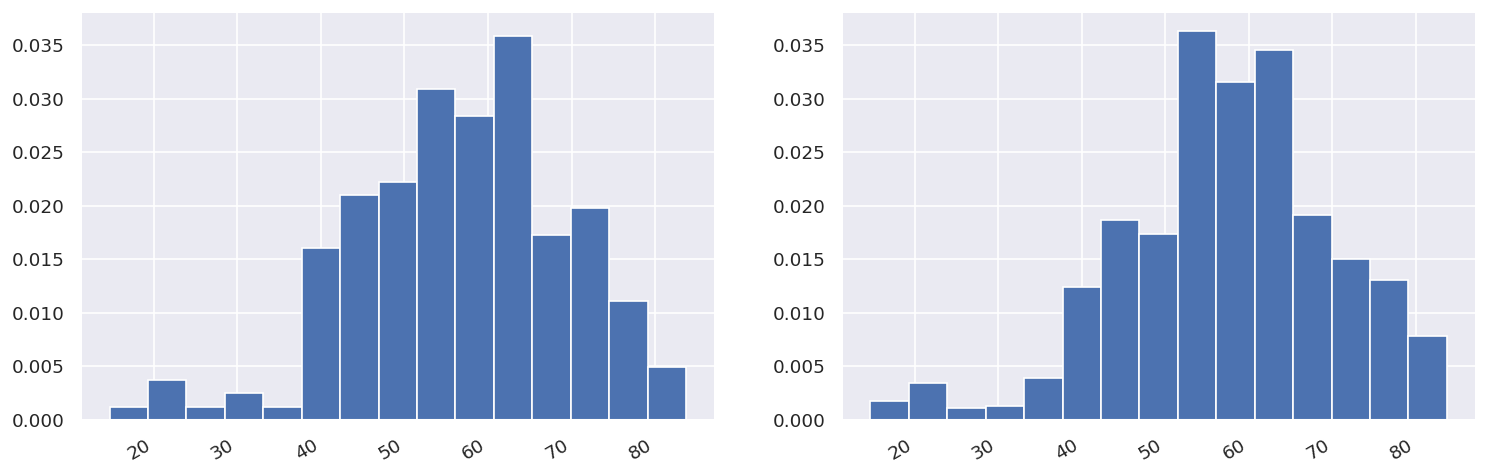

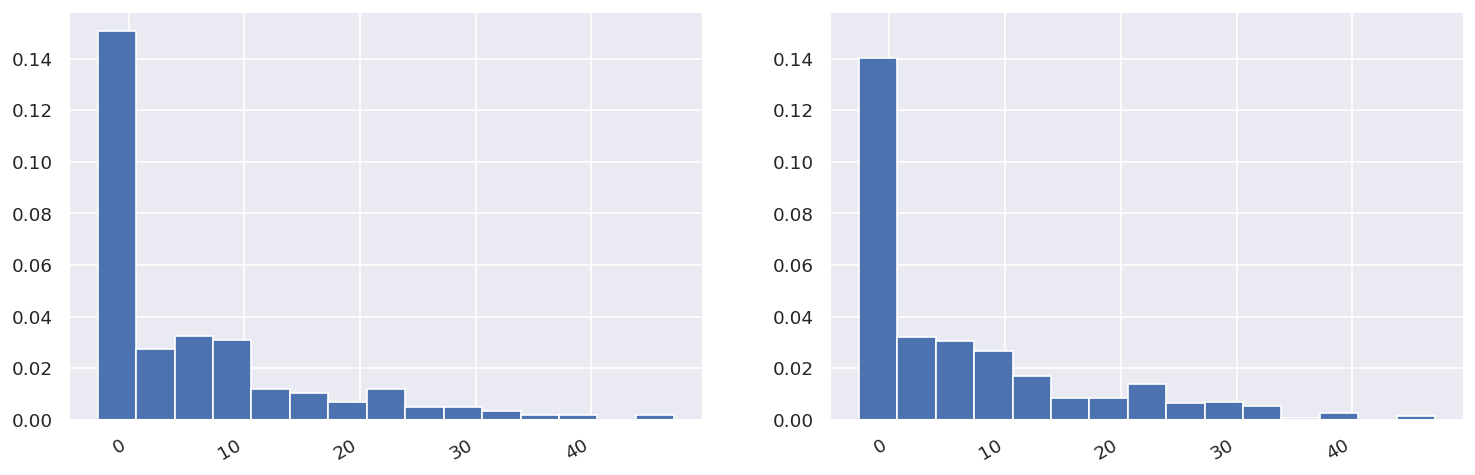

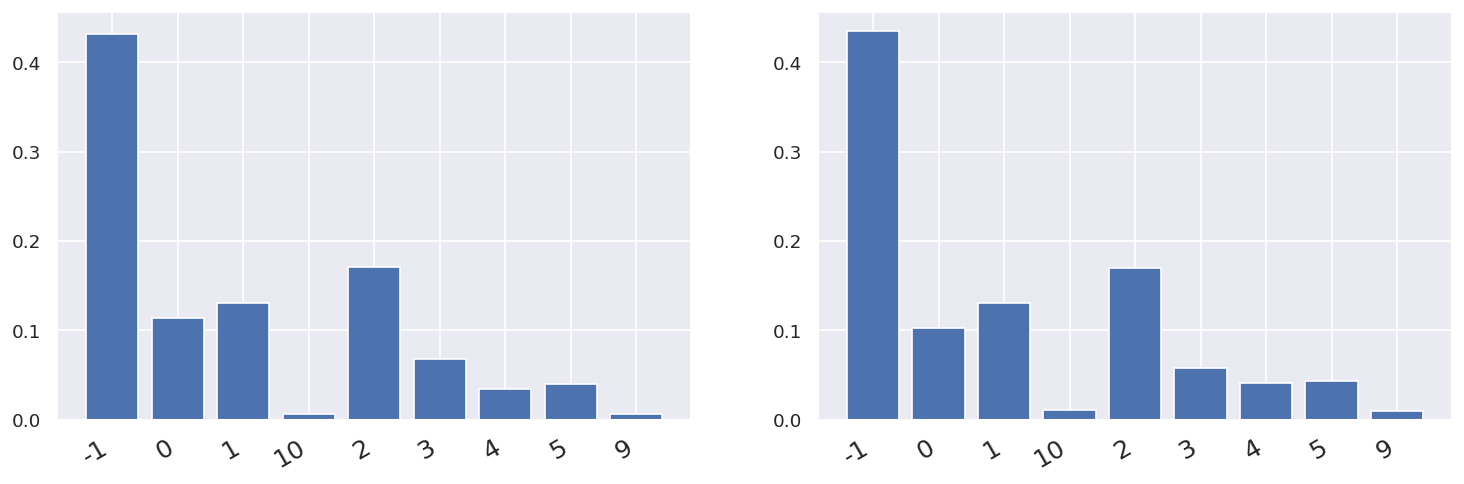

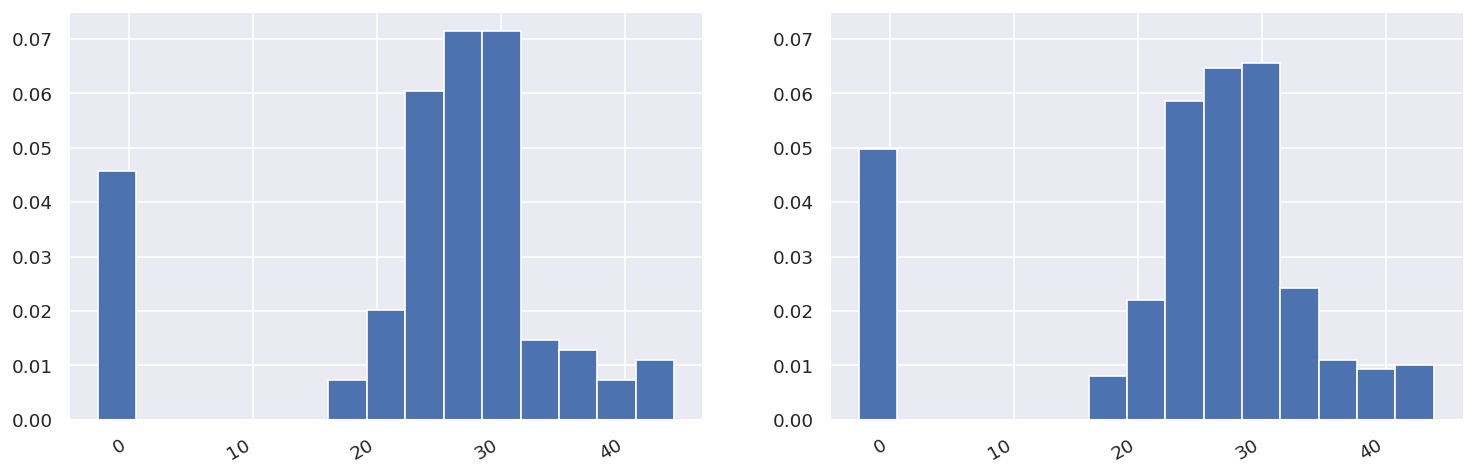

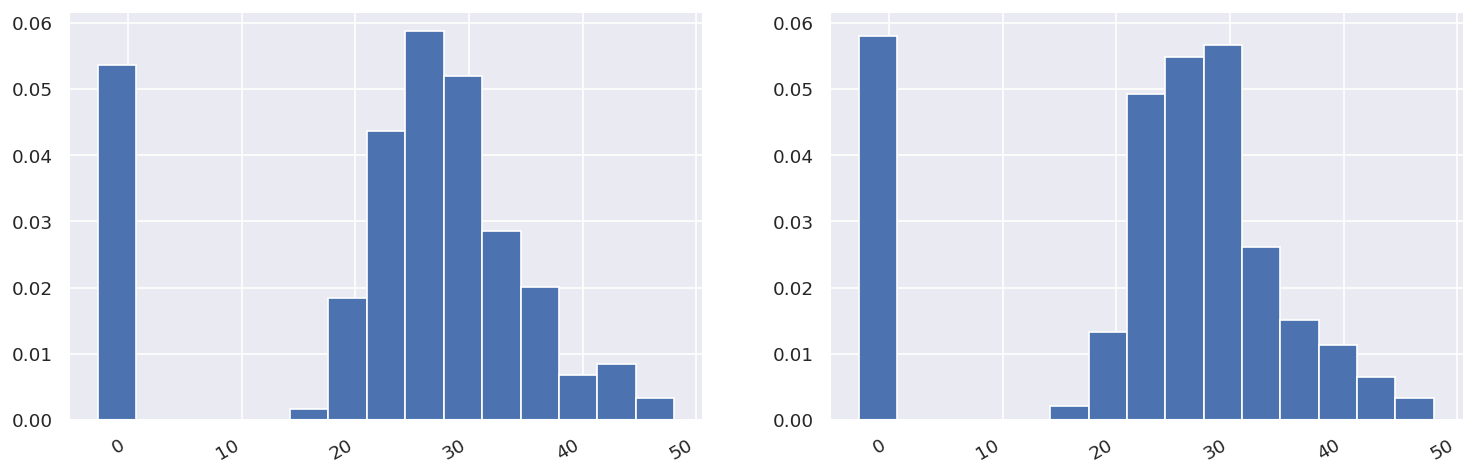

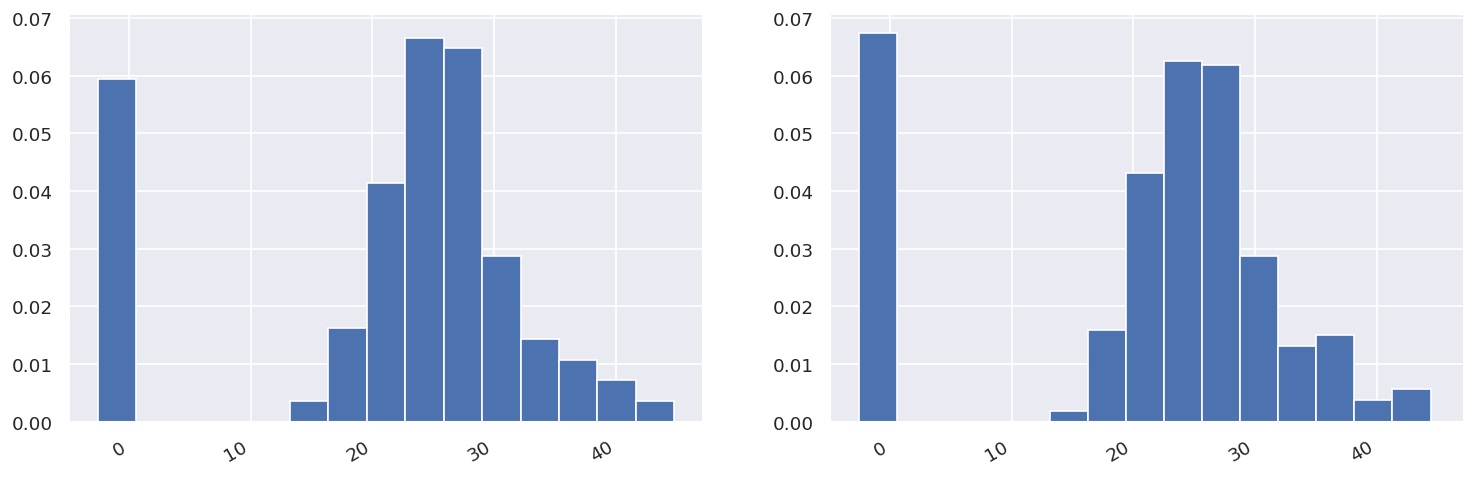

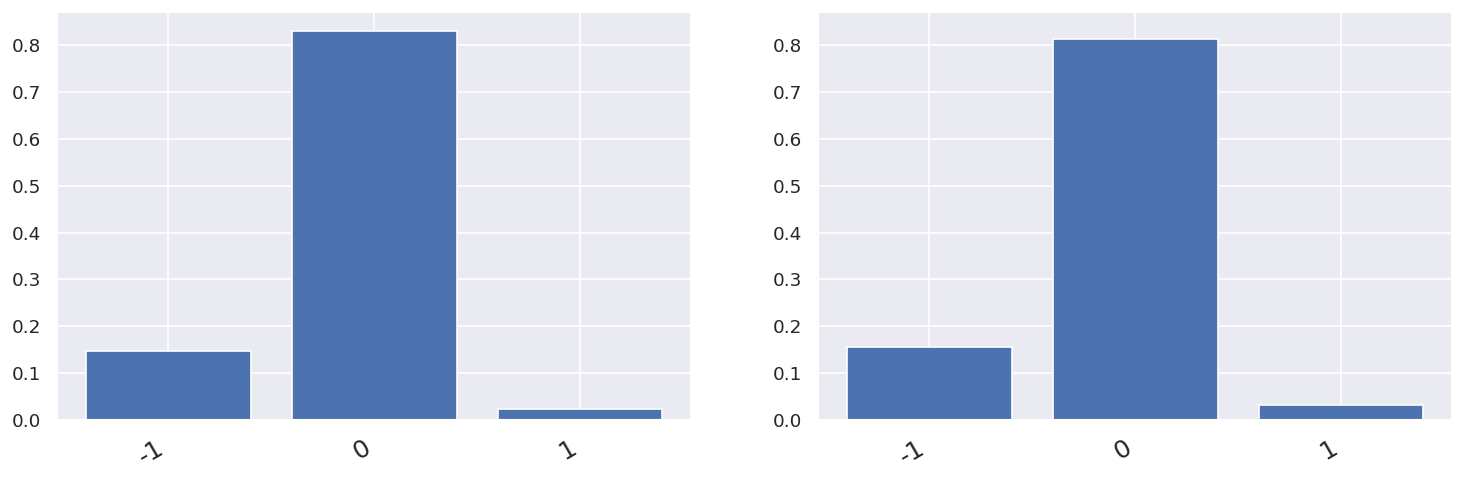

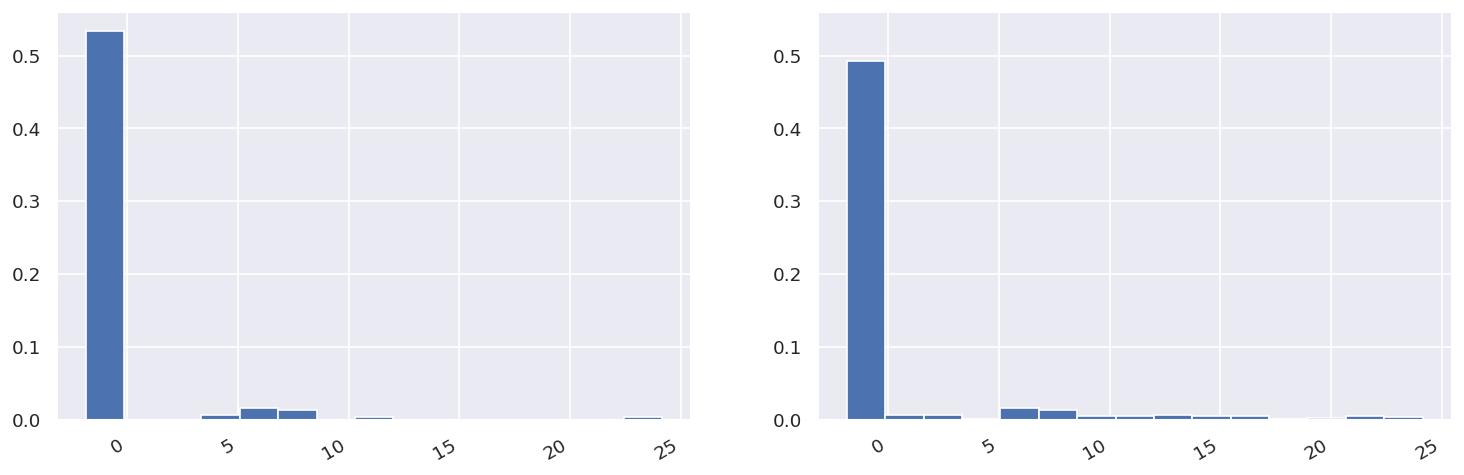

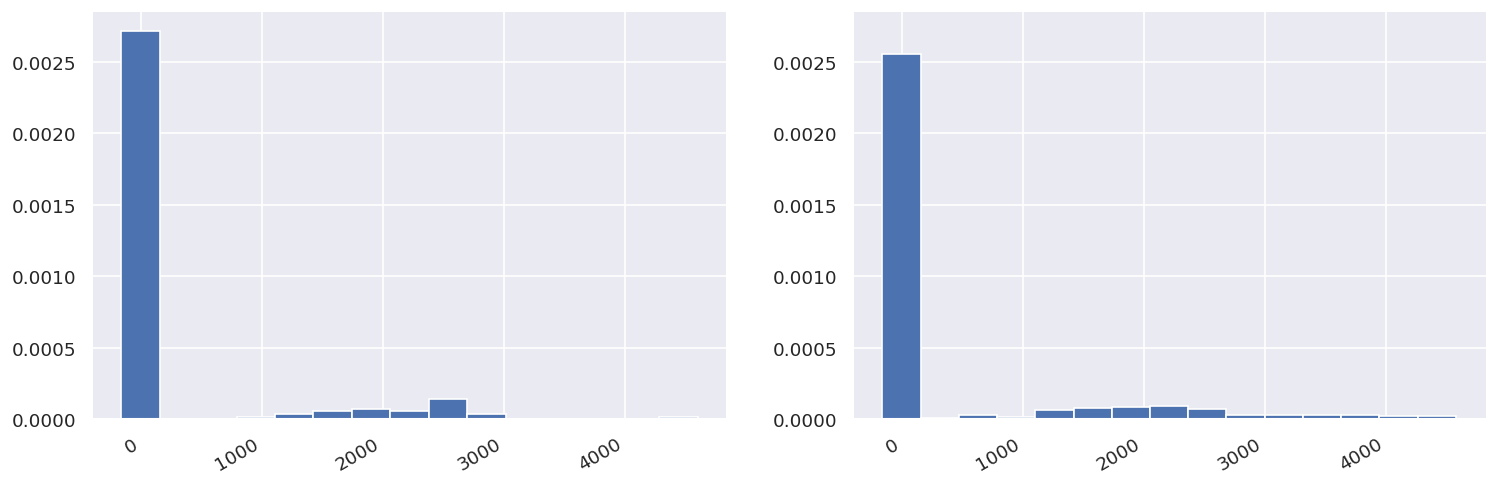

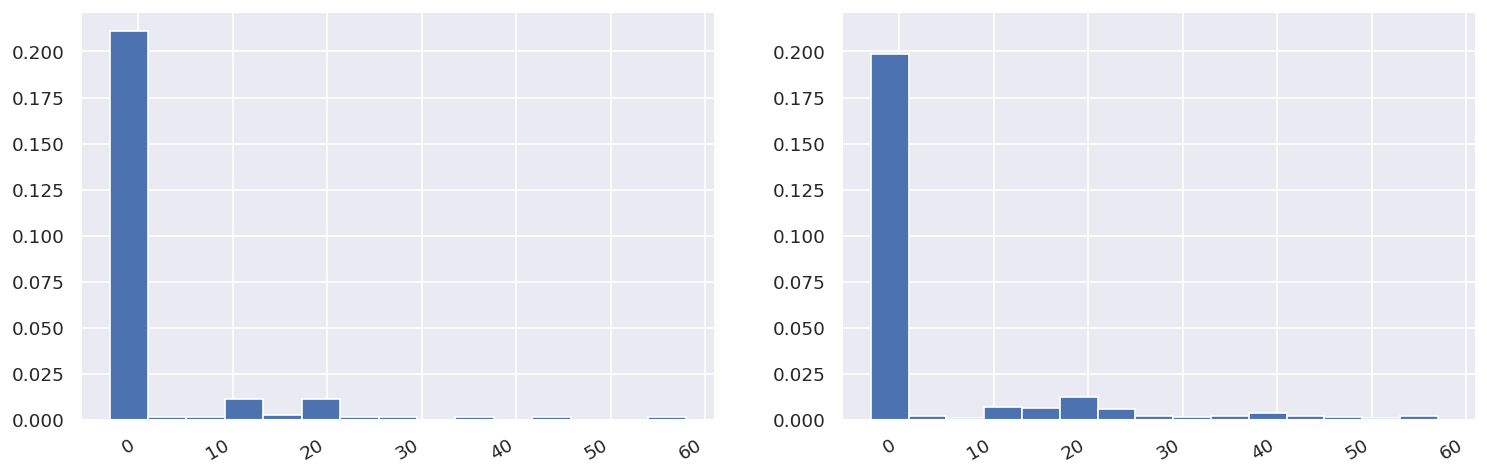

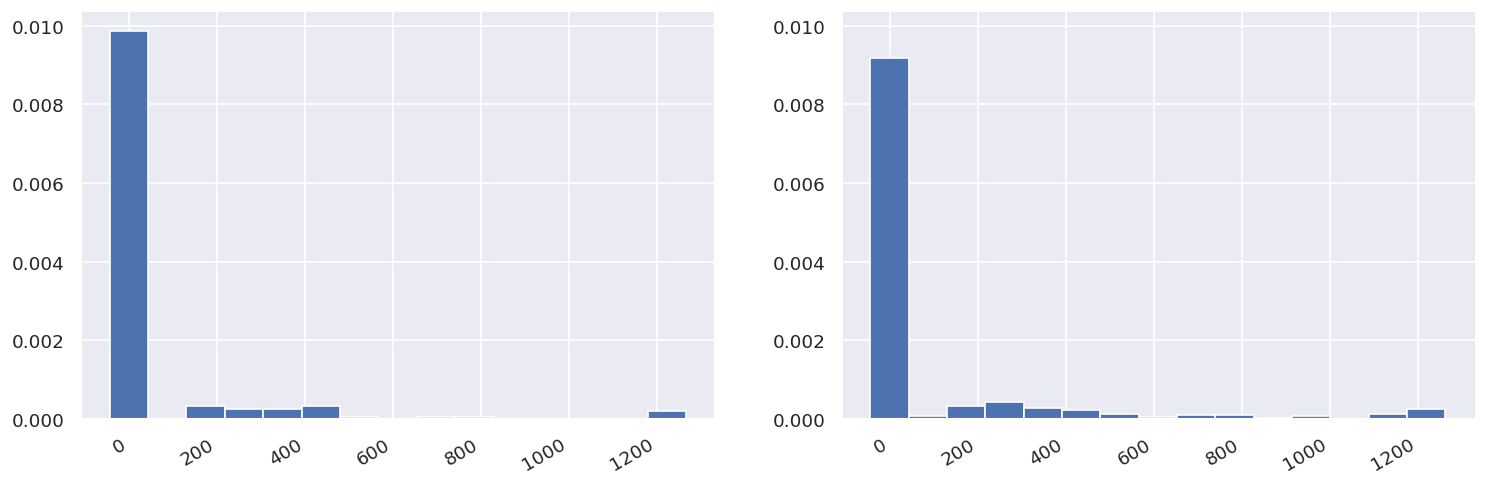

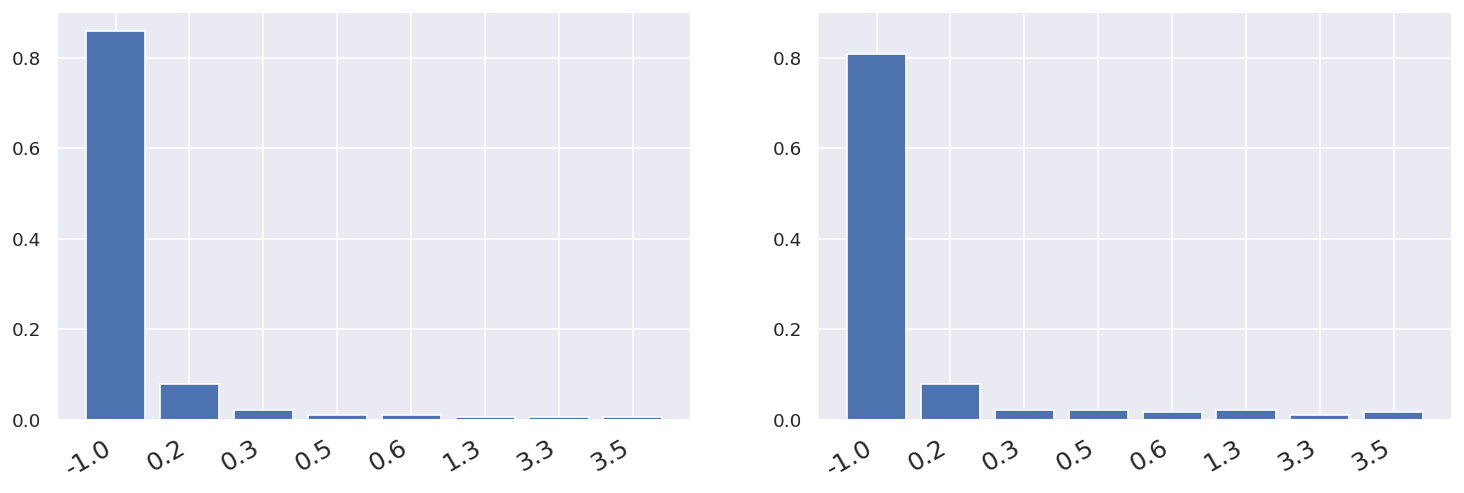

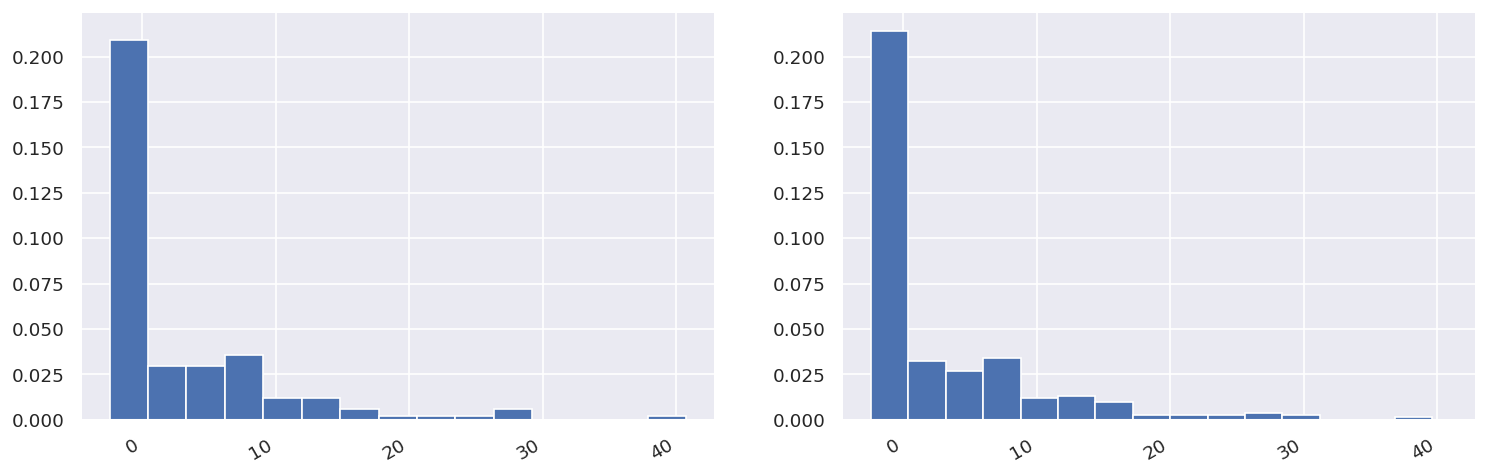

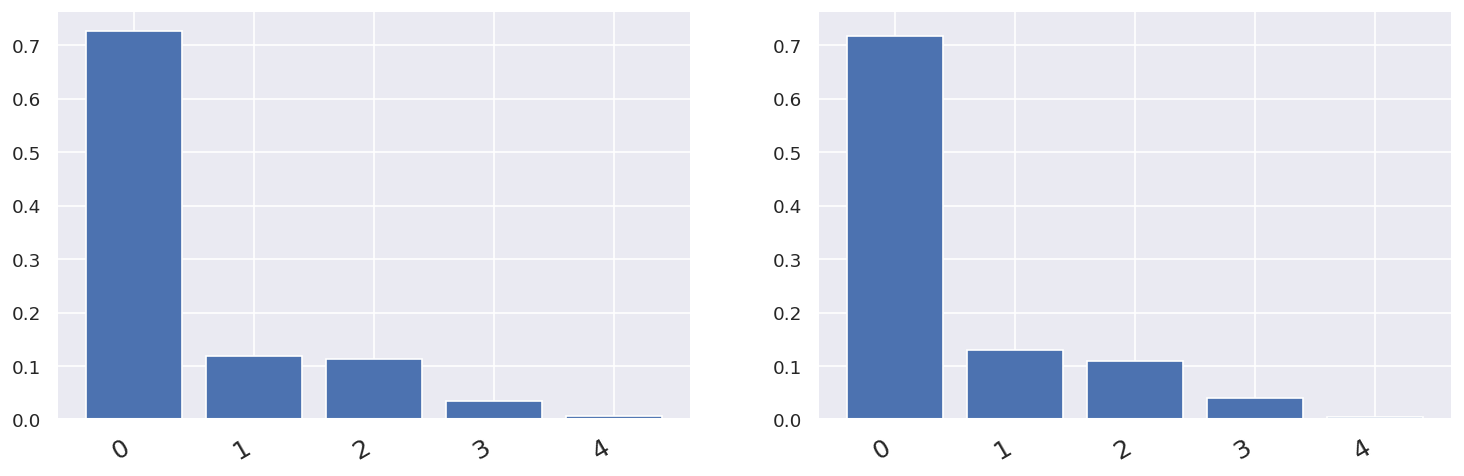

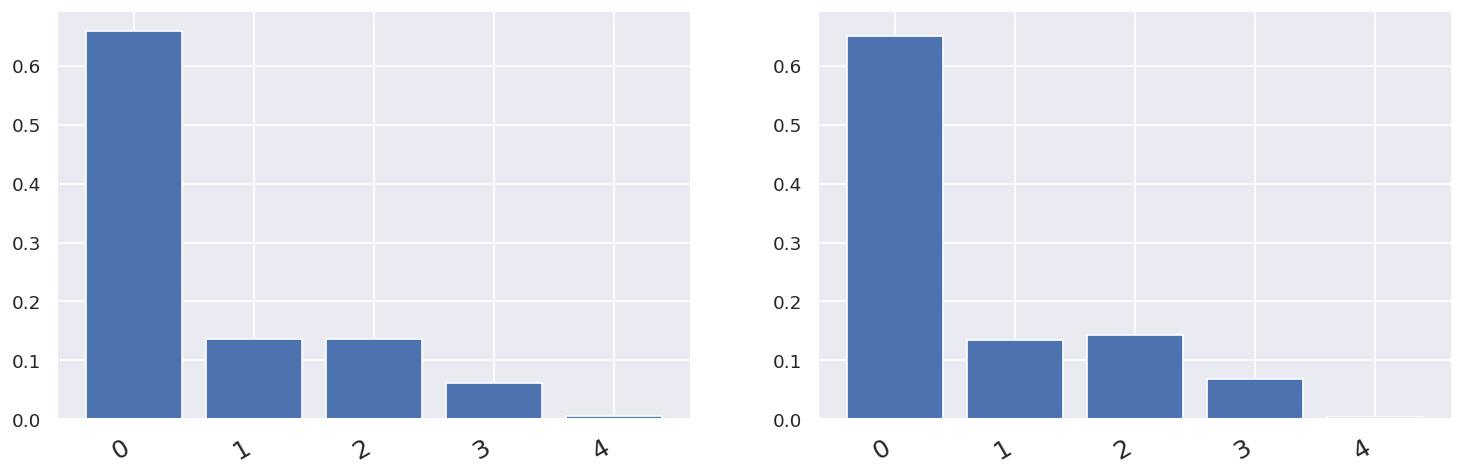

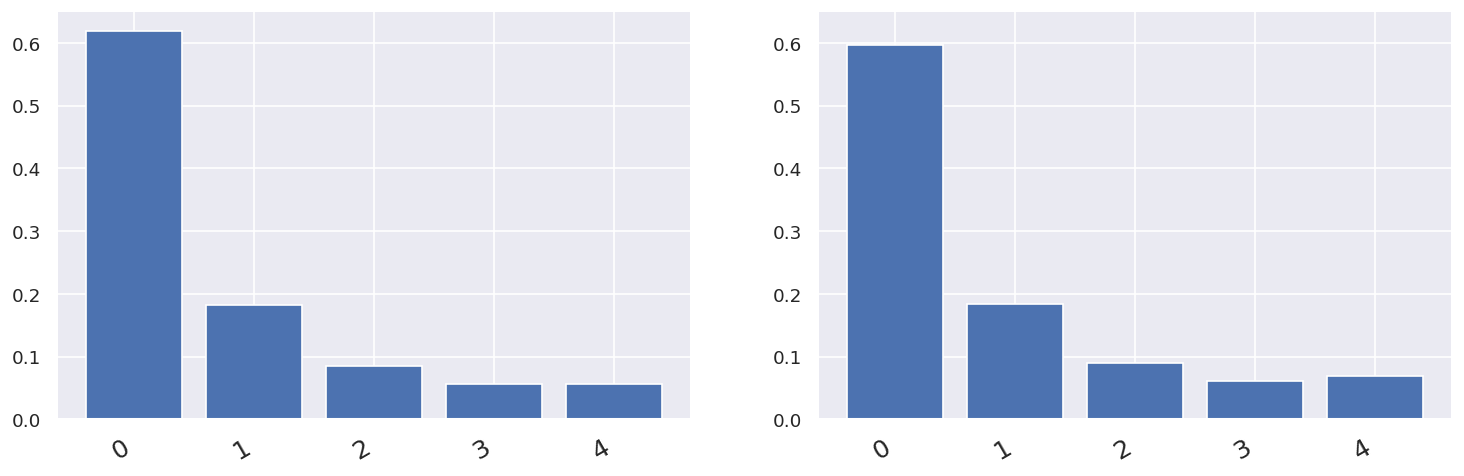

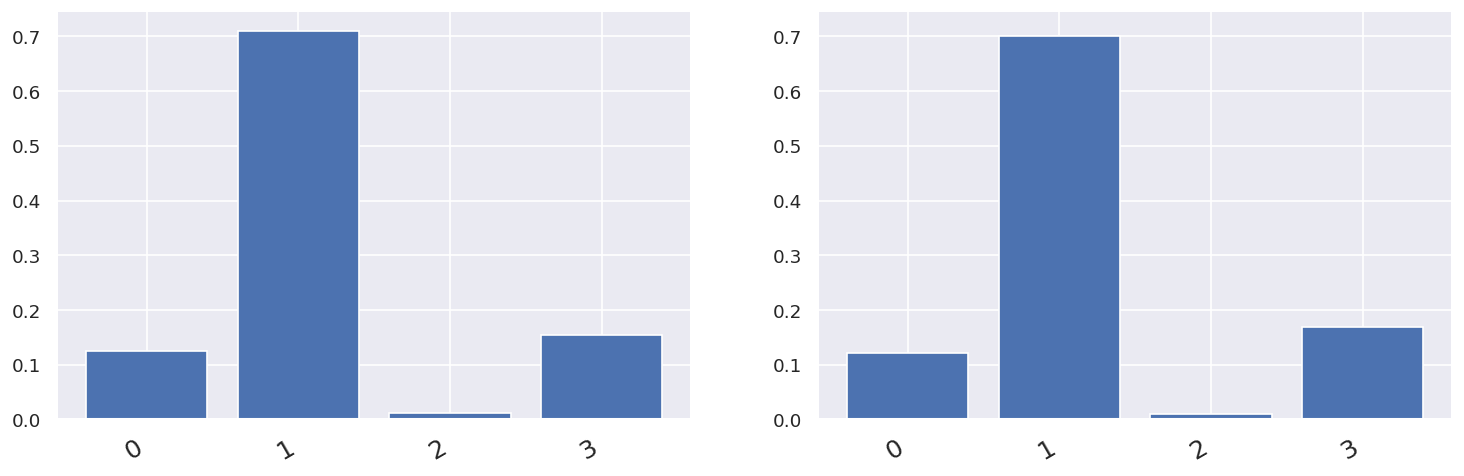

In [22]:
for attribute in synthetic_df.columns:
    inspector.compare_histograms(attribute)

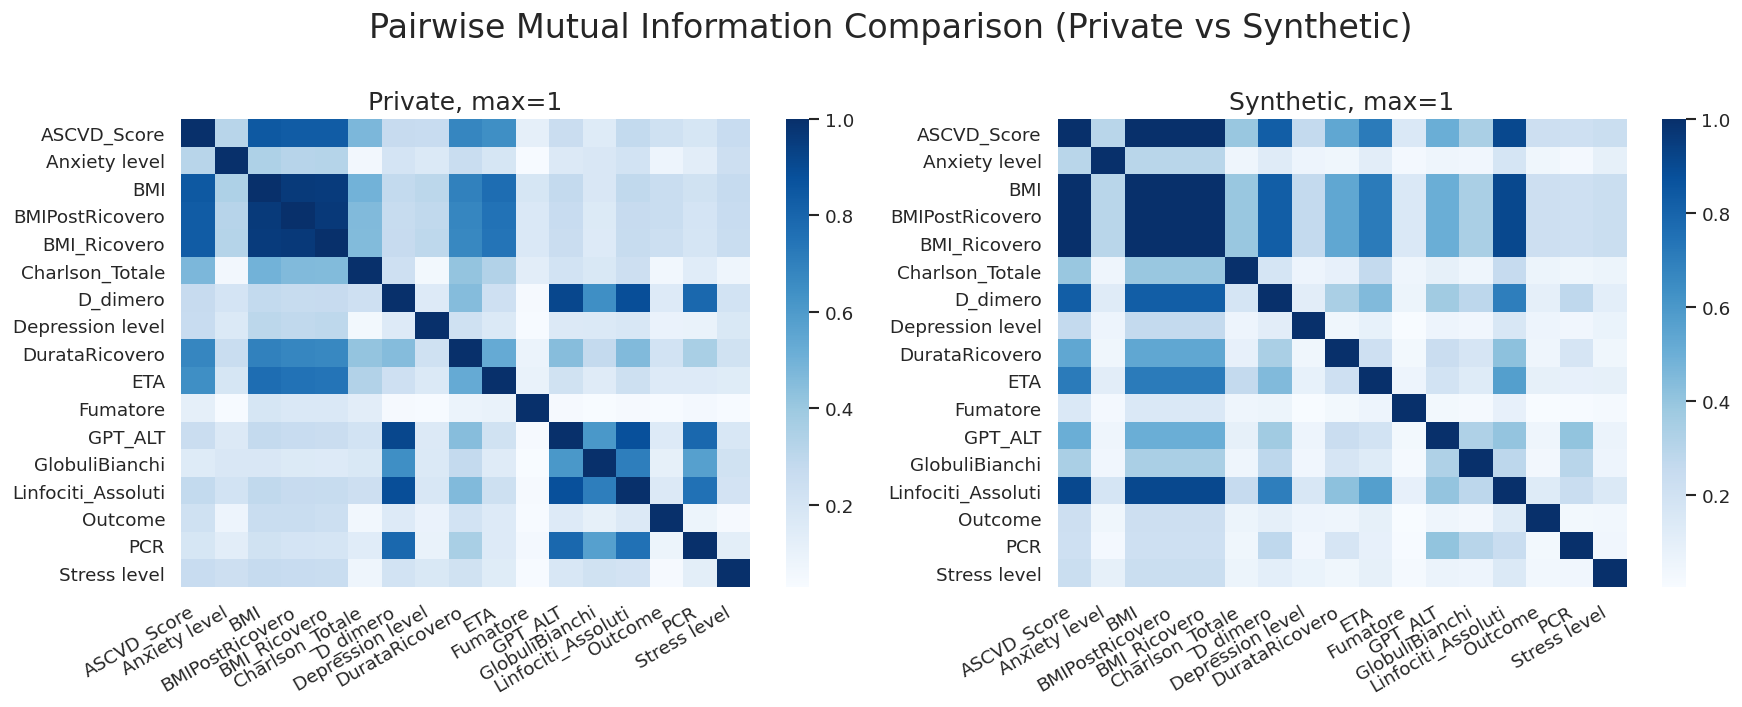

In [23]:
inspector.mutual_information_heatmap()

In [24]:
synthetic_df.head()

ETA  ASCVD_Score  Charlson_Totale        BMI  BMI_Ricovero  \
0  65.0     3.848230                2  22.755447     24.627185   
1  64.0     6.019194               -1  29.066822     28.918747   
2  67.0     5.920147               -1  22.727972     22.992111   
3  63.0     0.861106                2  25.026273     24.706680   
4  53.0    -0.532646                1  25.013100     29.288468   

   BMIPostRicovero  Fumatore  GlobuliBianchi  Linfociti_Assoluti  GPT_ALT  \
0        22.368973         0            -1.0                31.0      1.0   
1        26.262512         0            -1.0                 1.0      2.0   
2        20.839924         0             0.0               226.0      1.0   
3        24.034605         0             0.0               105.0      1.0   
4        27.495675         0            -1.0               156.0      1.0   

   D_dimero  PCR  DurataRicovero  Stress level  Depression level  \
0       3.0 -1.0            -1.0             1                 2   
1      19.0 -1.0             8.0             0                 0   
2       9.0 -1.0             2.0             2                 3   
3      12.0 -1.0            -1.0             0                 2   
4      27.0 -1.0             0.0             0                 0   

   Anxiety level  Outcome  
0              2        1  
1              0        1  
2              1        1  
3              2        1  
4              0        1

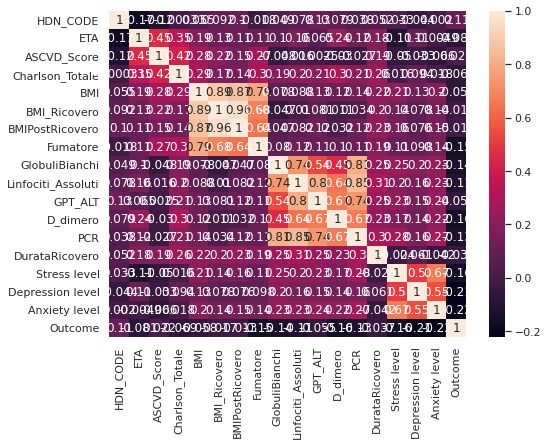

In [25]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [26]:
dfs.to_excel('synthetic_data_correlated_datatypes_0_degree_no_nan_proiezioni.xlsx')

In [27]:
df.shape, dfs.shape

((176, 18), (1000, 18))

In [28]:
dfs.head()

HDN_CODE   ETA  ASCVD_Score  Charlson_Totale        BMI  BMI_Ricovero  \
0         0  65.0     3.848230                2  22.755447     24.627185   
1         1  64.0     6.019194               -1  29.066822     28.918747   
2         2  67.0     5.920147               -1  22.727972     22.992111   
3         3  63.0     0.861106                2  25.026273     24.706680   
4         4  53.0    -0.532646                1  25.013100     29.288468   

   BMIPostRicovero  Fumatore  GlobuliBianchi  Linfociti_Assoluti  GPT_ALT  \
0        22.368973         0            -1.0                31.0      1.0   
1        26.262512         0            -1.0                 1.0      2.0   
2        20.839924         0             0.0               226.0      1.0   
3        24.034605         0             0.0               105.0      1.0   
4        27.495675         0            -1.0               156.0      1.0   

   D_dimero  PCR  DurataRicovero  Stress level  Depression level  \
0       3.0 -1.0            -1.0             1                 2   
1      19.0 -1.0             8.0             0                 0   
2       9.0 -1.0             2.0             2                 3   
3      12.0 -1.0            -1.0             0                 2   
4      27.0 -1.0             0.0             0                 0   

   Anxiety level  Outcome  
0              2        1  
1              0        1  
2              1        1  
3              2        1  
4              0        1

In [29]:
df['Outcome'].value_counts()

1    125
3     27
0     22
2      2
Name: Outcome, dtype: int64